# working on Stroke Prediction 

##### What is Stroke Prdiction
Stroke prediction refers to the process of using machine learning (ML) algorithms to 
assess an individual's risk of experiencing a stroke in the future. Stroke is a serious 
medical condition that occur
s when the blood supply to part of the brain is interrupted or 
reduced, depriving brain tissue of oxygen and nutrients. This can lead to brain damage and 
potentially life-threatening complications.

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns

### step 1 : dataset


In [31]:
disease_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = disease_data
# here target is the dependent variable giving the final output : 0 : no disease , 1 : disease hai

### step 2 : Data Preprocessing
#### handlign missing values , outliers


In [32]:
df.shape

(5110, 12)

In [37]:
df.isna().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [40]:
#handling bmi values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [43]:
# pip install missingno

Note: you may need to restart the kernel to use updated packages.


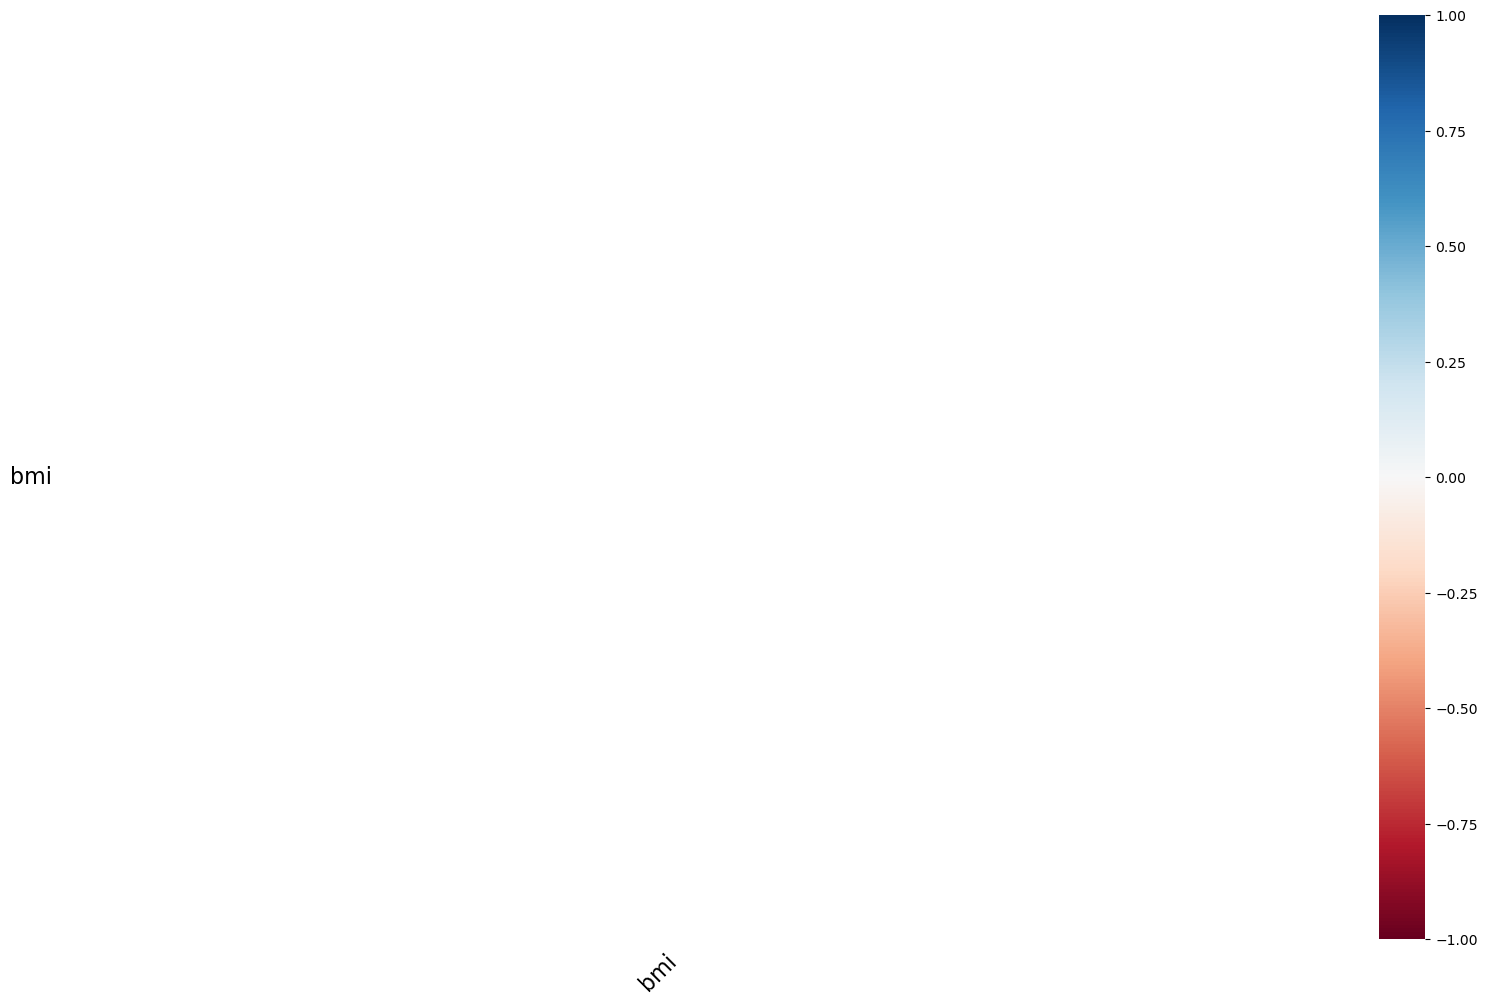

In [49]:
# visualizing the missing values
import seaborn as sn 
import matplotlib.pyplot as plt 
import missingno as msno
msno.heatmap(disease_data)
plt.show()
#here we can see that no bmi values 

In [53]:
# now replacign the missing values of bmi column by mean value of that particular column
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['bmi']

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [57]:
df.isnull().sum()  # no missing values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [61]:
df.duplicated().sum() # now duplicacy 

0

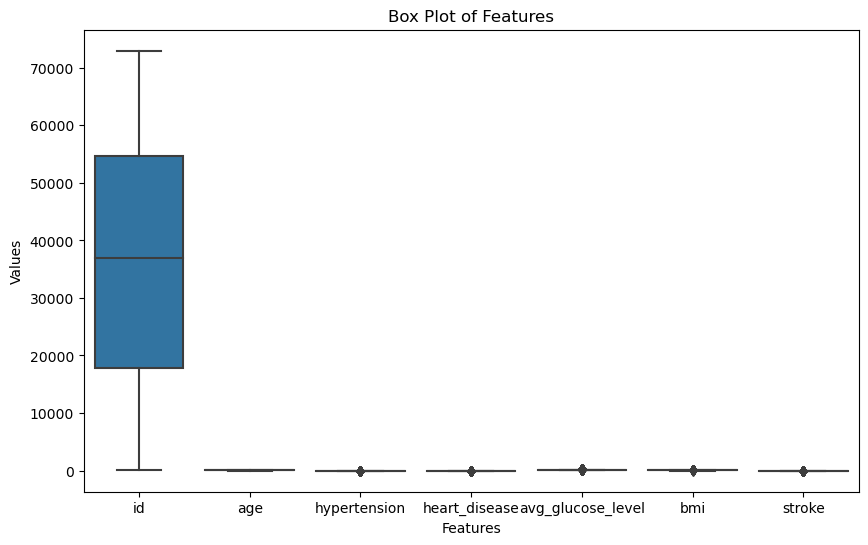

In [67]:
#checking for outliers
# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

# so we can say no outliers bcs values are within specific  range (20k - 55k)

In [74]:
# now normalizing datset of columns having numeric values by sub mean from every value
# print(df)


def normalize_numeric_columns(data):
    numeric_cols = data.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())
    return data

# Normalize columns with numeric values using Min-Max scaling
normalized_data = normalize_numeric_columns(df)

# Print normalized data
print("\n\nNormalized Data:")
print(normalized_data.head())
normalized_df = normalized_data
# print(normalized_data)



Normalized Data:
         id  gender       age  hypertension  heart_disease ever_married  \
0  0.123214    Male  0.816895           0.0            1.0          Yes   
1  0.708205  Female  0.743652           0.0            0.0          Yes   
2  0.426015    Male  0.975586           0.0            1.0          Yes   
3  0.824928  Female  0.597168           0.0            0.0          Yes   
4  0.021929  Female  0.963379           1.0            0.0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           0.801265  0.301260  formerly smoked   
1  Self-employed          Rural           0.679023  0.212981     never smoked   
2        Private          Rural           0.234512  0.254296     never smoked   
3        Private          Urban           0.536008  0.276060           smokes   
4  Self-employed          Rural           0.549349  0.156930     never smoked   

   stroke  
0     1.0  
1     1.0  
2     1

In [77]:
df = normalized_df    # new df
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,Male,0.816895,0.0,1.0,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1.0
1,0.708205,Female,0.743652,0.0,0.0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1.0
2,0.426015,Male,0.975586,0.0,1.0,Yes,Private,Rural,0.234512,0.254296,never smoked,1.0
3,0.824928,Female,0.597168,0.0,0.0,Yes,Private,Urban,0.536008,0.276060,smokes,1.0
4,0.021929,Female,0.963379,1.0,0.0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,Female,0.975586,1.0,0.0,Yes,Private,Urban,0.132167,0.212981,never smoked,0.0
5106,0.614850,Female,0.987793,0.0,0.0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0.0
5107,0.269730,Female,0.426270,0.0,0.0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0.0
5108,0.514278,Male,0.621582,0.0,0.0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0.0


In [78]:
df.describe()  # all the mjaor needed values 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.500197,0.526692,0.097456,0.054012,0.235563,0.212981,0.048728
std,0.290392,0.276033,0.296607,0.226063,0.209046,0.088179,0.215320
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242535,0.304199,0.000000,0.000000,0.102137,0.154639,0.000000
50%,0.505880,0.548340,0.000000,0.000000,0.169721,0.207331,0.000000
75%,0.749455,0.743652,0.000000,0.000000,0.272228,0.257732,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
df['stroke'] # 0: negative result, 1 : positive result

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

### preprocessing done => Feature SElection started

In [111]:
# now splittign data into dependent and independent featueres
X = df.drop(columns='stroke', axis = 1)
Y = df['stroke']
print(X, Y)

            id  gender       age  hypertension  heart_disease ever_married  \
0     0.123214    Male  0.816895           0.0            1.0          Yes   
1     0.708205  Female  0.743652           0.0            0.0          Yes   
2     0.426015    Male  0.975586           0.0            1.0          Yes   
3     0.824928  Female  0.597168           0.0            0.0          Yes   
4     0.021929  Female  0.963379           1.0            0.0          Yes   
...        ...     ...       ...           ...            ...          ...   
5105  0.249297  Female  0.975586           1.0            0.0          Yes   
5106  0.614850  Female  0.987793           0.0            0.0          Yes   
5107  0.269730  Female  0.426270           0.0            0.0          Yes   
5108  0.514278    Male  0.621582           0.0            0.0          Yes   
5109  0.612188  Female  0.536133           0.0            0.0          Yes   

          work_type Residence_type  avg_glucose_level       bmi

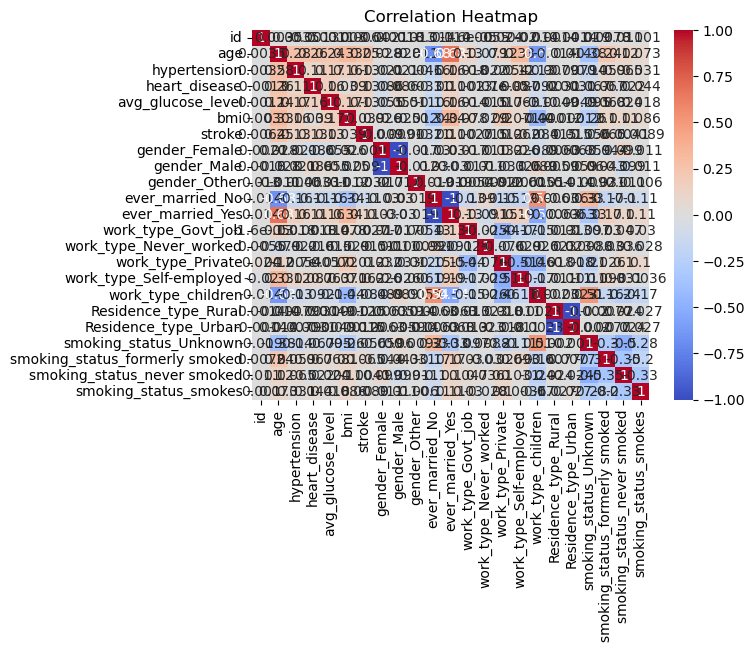

In [117]:
# Convert categorical variables into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df)
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >, <Axes: >]],
      dtype=object)

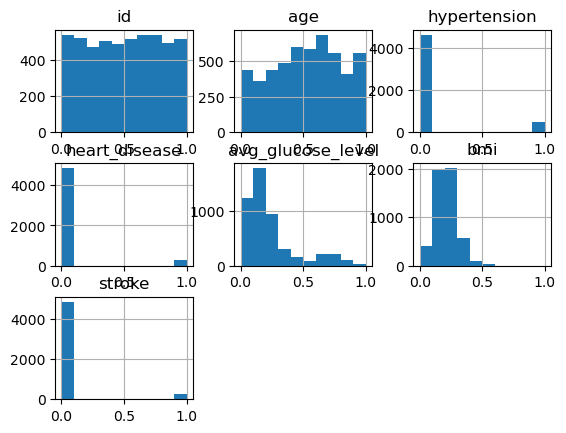

In [116]:
df.hist()

In [118]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [128]:
#removing unvaluable attrubutes
columns_to_drop = ['gender', 'ever_married', 'work_type', 'Residence_type']

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,0.816895,0.0,1.0,0.801265,0.301260,formerly smoked,1.0
1,0.708205,0.743652,0.0,0.0,0.679023,0.212981,never smoked,1.0
2,0.426015,0.975586,0.0,1.0,0.234512,0.254296,never smoked,1.0
3,0.824928,0.597168,0.0,0.0,0.536008,0.276060,smokes,1.0
4,0.021929,0.963379,1.0,0.0,0.549349,0.156930,never smoked,1.0
...,...,...,...,...,...,...,...,...
5105,0.249297,0.975586,1.0,0.0,0.132167,0.212981,never smoked,0.0
5106,0.614850,0.987793,0.0,0.0,0.323516,0.340206,never smoked,0.0
5107,0.269730,0.426270,0.0,0.0,0.128658,0.232532,never smoked,0.0
5108,0.514278,0.621582,0.0,0.0,0.513203,0.175258,formerly smoked,0.0


In [138]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke
0,1,45,0,0,80,25,never smoked,0
1,2,55,1,0,90,30,formerly smoked,1
2,3,65,0,1,100,35,never smoked,0
3,4,35,1,0,110,20,smokes,1
4,5,75,0,1,120,40,formerly smoked,0


In [145]:
print(X, end = "\n\n")
print(Y)
xx = X.drop(columns = 'smoking_status')

   age  hypertension  heart_disease  avg_glucose_level  bmi   smoking_status
0   45             0              0                 80   25     never smoked
1   55             1              0                 90   30  formerly smoked
2   65             0              1                100   35     never smoked
3   35             1              0                110   20           smokes
4   75             0              1                120   40  formerly smoked

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64


In [149]:
# Apply SelectKBest to select top k features
k = 3  # Number of features to select
best_features = SelectKBest(score_func=chi2, k=k)
fit = best_features.fit(xx, y)

# Get selected feature names
feature_names = xx.columns[fit.get_support()]

# Print selected feature names
print("Selected features:")
print(feature_names)

Selected features:
Index(['age', 'hypertension', 'bmi'], dtype='object')


In [241]:
# creating new dataset with extracted features only 
columns_to_copy = ['age', 'hypertension', 'bmi']

# Create a new DataFrame with only the specified columns
X = disease_data[columns_to_copy].copy()
print(X.head(10))
print(Y)

        age  hypertension       bmi
0  0.816895           0.0  0.301260
1  0.743652           0.0  0.212981
2  0.975586           0.0  0.254296
3  0.597168           0.0  0.276060
4  0.963379           1.0  0.156930
5  0.987793           0.0  0.214204
6  0.902344           1.0  0.195876
7  0.841309           0.0  0.143184
8  0.719238           0.0  0.212981
9  0.951172           0.0  0.159221
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64


In [189]:
# we have X, Y as independent and dependent variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(5110, 3) (4088, 3) (1022, 3)


#### Applying decision trees

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


In [203]:

clf = DecisionTreeClassifier()

# Fit the classifier to the training data
clf.fit(X_train, Y_train)

# Predict the labels for the test data
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)


In [205]:
# Print the evaluation metrics
print("Accuracy of decision tree :", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy of decision tree : 0.9246575342465754
Precision: 0.15384615384615385
Recall: 0.12


In [208]:


#  hyperparameter grid from google 
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)

# Print the evaluation metrics
print("After hyperParameter tunning")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


After hyperParameter tunning
Accuracy: 0.949119373776908
Precision: 0.0
Recall: 0.0


#### Applying logistic regression

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, fbeta_score


In [229]:
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [197]:
logistic_reg_accuracy = accuracy_score(model.predict(X_train), Y_train)
# print("Accuracy of training data: ", logistic_reg_accuracy*100, "%")

log_reg_acc_testData = accuracy_score(model.predict(X_test), Y_test)
print("Accuracy of testing  data for logistic regression: ", log_reg_acc_testData*100, "%")


Accuracy of testing  data for logistic regression:  95.10763209393346 %


In [211]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Create a LogisticRegression object
model = LogisticRegression()

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
# print("Best hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
log_reg_acc_testData = accuracy_score(best_model.predict(X_test), Y_test)
print("Accuracy on test data after hyper tunning the parameters :", log_reg_acc_testData)


Accuracy on test data after hyper tunning the parameters : 0.9510763209393346


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _chec

#### Applying random forest firstly 

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an instance of Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, Y_train)

# Predict the labels for the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model performance using accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy of testing data ", accuracy*100, "%")

Accuracy of testing data  94.12915851272015 %


In [199]:
recall = recall_score(Y_test, y_pred)
fbeta = fbeta_score(Y_test, y_pred, beta=1)
# Print the recall and F-beta score
print("Recall:", recall)
print("F-beta score:", fbeta)


Recall: 0.06
F-beta score: 0.09090909090909091


##### Testing the data on the logisticRegression model because its giving high accuracy 

In [244]:
inputD = (0.975586, 1.0 ,0.212981)
inputD2 = (0.975586, 0.0 , 0.254296)
inputD3 = (0.536133 ,0.0 , 0.182131)
inputD4 = (0.841309, 0.0 , 0.143184)
# changing to array
arr_inp = np.asarray(inputD)
final_arr = arr_inp.reshape(1,-1)
prediction = model.predict(final_arr)
print(prediction)

arr_inp2 = np.asarray(inputD2)
final_arr = arr_inp2.reshape(1,-1)
prediction = model.predict(final_arr)
print(prediction)

arr_inp3 = np.asarray(inputD3)
final_arr = arr_inp3.reshape(1,-1)



arr_inp4 = np.asarray(inputD4)
final_arr = arr_inp4.reshape(1,-1)

[0.]
[0.]
[0.]
[0.]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [239]:
inputD = (0.975586, 1.0 ,0.212981)
arr_inp = np.asarray(inputD)
final_arr = arr_inp.reshape(1,-1)
prediction = model.predict(final_arr)
print(prediction)


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [247]:
# here we can add multiple inputs accordingly
inputDs = [
    (0.841309, 0.0 , 0.143184),
    (0.975586, 0.0 , 0.254296),
    (0.536133 ,0.0 , 0.182131),
    (0.975586, 1.0, 0.212981)
]

# Define a list to store predictions
predictions = []

# Iterate over each inputD
for inputD in inputDs:
    # Transform categorical variables
    transformed_inputD = []
    for i, val in enumerate(inputD):
        if isinstance(val, str):  # Check if the value is a string (categorical)
            transformed_inputD.append(label_encoders[i].transform([val])[0])  # Transform the string using the fitted LabelEncoder
        else:
            transformed_inputD.append(val)  # Keep numeric values as they are

    # Convert the transformed inputD to array and reshape it
    arr_inp = np.asarray(transformed_inputD)
    final_arr = arr_inp.reshape(1, -1)

    # Make prediction
    prediction = model.predict(final_arr)
    predictions.append(prediction)

# Print predictions
print(predictions)


[array([0.]), array([0.]), array([0.]), array([0.])]


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
